### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
import xgboost as xgb
from xgboost import XGBRegressor
from scipy.stats import uniform, randint



# EDA

## Data cleaning

In [3]:
csv_dir=r'C:\Users\HP\Desktop\Projects\Reto Hackathon barcelona activa\2023_accidents_causa_conductor_gu_bcn_.csv'
df=pd.read_csv(csv_dir)

In [4]:
df.sample(10)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
1655,2023S002097,3,Sants-Montjuïc,13,la Marina de Port,369408,Zona Franca,0121 0121,Dimarts,2023,4,Abril,4,20,Tarda,Manca d'atenció a la conducció,428200.17,4579031.23,2.140493,41.357738
377,2023S007450,2,Eixample,8,l'Antiga Esquerra de l'Eixample,245802,París,0180 0180,Divendres,2023,12,Desembre,15,12,Matí,Manca d'atenció a la conducció,429269.91,4582970.53,2.152820,41.393312
3173,2023S005339,8,Nou Barris,48,la Guineueta,351901,Valldaura,0150 0152,Divendres,2023,9,Setembre,8,18,Tarda,Desobeir semàfor,430446.33,4588059.23,2.166306,41.439247
655,2023S001758,4,Les Corts,20,la Maternitat i Sant Ramon,701434,Mig (Descendent),000230000,Dilluns,2023,3,Març,27,15,Tarda,Manca precaució incorporació circulació,427119.02,4582149.08,2.127194,41.385722
260,2023S006761,2,Eixample,10,Sant Antoni,308709,Sant Pau,0055 0057,Dimarts,2023,11,Novembre,14,18,Tarda,Desobeir semàfor,430241.22,4581209.27,2.164641,41.377534
6146,2023S005545,3,Sants-Montjuïc,16,la Bordeta,160903,Ildefons Cerdà,0004 0006,Dilluns,2023,9,Setembre,4,12,Matí,Gir indegut o sense precaució,427857.18,4579829.60,2.136298,41.364898
1929,2023S006965,5,Sarrià-Sant Gervasi,27,el Putxet i el Farró,302906,Sant Hermenegild,0032 0032,Dijous,2023,11,Novembre,23,17,Tarda,Desconegut,428576.44,4584035.47,2.144401,41.402843
4027,2023S007732,4,Les Corts,20,la Maternitat i Sant Ramon,100708,Arístides Maillol,0002 0002,Diumenge,2023,12,Desembre,31,17,Tarda,Manca d'atenció a la conducció,426444.02,4581544.41,2.119195,41.380214
3020,2023S002305,5,Sarrià-Sant Gervasi,27,el Putxet i el Farró,143904,General Mitre,0222B0222B,Divendres,2023,4,Abril,21,16,Tarda,Canvi de carril sense precaució,428852.95,4584342.97,2.147672,41.405637
1548,2023S004990,2,Eixample,5,el Fort Pienc,197302,Marina,0178 0178,Diumenge,2023,8,Agost,20,18,Tarda,Avançament defectuós/improcedent,431648.43,4583591.24,2.181199,41.399109


In [5]:
df.shape

(8897, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8897 entries, 0 to 8896
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Numero_expedient          8897 non-null   object 
 1   Codi_districte            8897 non-null   int64  
 2   Nom_districte             8897 non-null   object 
 3   Codi_barri                8897 non-null   int64  
 4   Nom_barri                 8897 non-null   object 
 5   Codi_carrer               8897 non-null   int64  
 6   Nom_carrer                8897 non-null   object 
 7   Num_postal                8893 non-null   object 
 8   Descripcio_dia_setmana    8897 non-null   object 
 9   NK_Any                    8897 non-null   int64  
 10  Mes_any                   8897 non-null   int64  
 11  Nom_mes                   8897 non-null   object 
 12  Dia_mes                   8897 non-null   int64  
 13  Hora_dia                  8897 non-null   int64  
 14  Descripc

In [7]:
df.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,11,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587


### Tratamiento de nulos

In [8]:
df.isnull().sum()


Numero_expedient            0
Codi_districte              0
Nom_districte               0
Codi_barri                  0
Nom_barri                   0
Codi_carrer                 0
Nom_carrer                  0
Num_postal                  4
Descripcio_dia_setmana      0
NK_Any                      0
Mes_any                     0
Nom_mes                     0
Dia_mes                     0
Hora_dia                    0
Descripcio_torn             0
Descripcio_causa_mediata    0
Coordenada_UTM_X_ED50       0
Coordenada_UTM_Y_ED50       0
Longitud_WGS84              0
Latitud_WGS84               0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.groupby('Nom_districte').count()

,Numero_expedient,Codi_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
Nom_districte,,,,,,,,,,,,,,,,,,,
Ciutat Vella,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507
Desconegut,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Eixample,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407
Gràcia,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434
Horta-Guinardó,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651
Les Corts,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655
Nou Barris,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527
Sant Andreu,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612
Sant Martí,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069


## Visualizacion de datos

### Accidentes por hora

<Axes: xlabel='Descripcio_torn'>

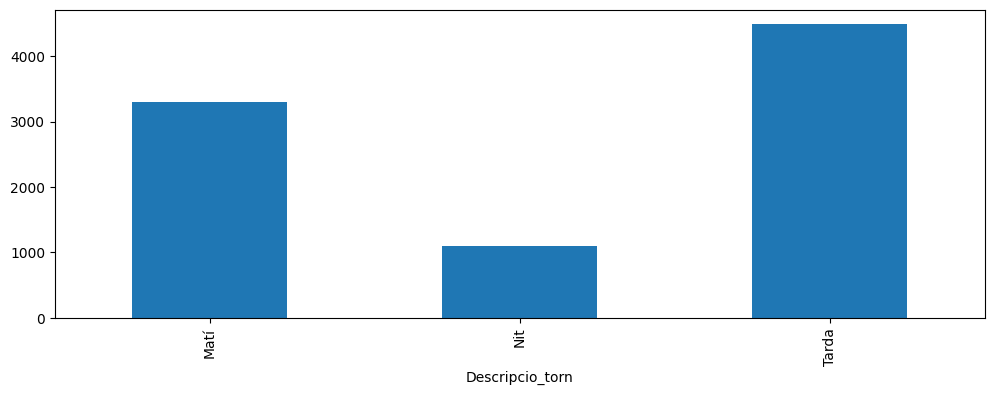

In [17]:

(
    df.
    groupby(["Descripcio_torn"])
    ['Numero_expedient'].count()
    .plot(kind = "bar", figsize = (12, 4))
)

<Axes: xlabel='Hora_dia'>

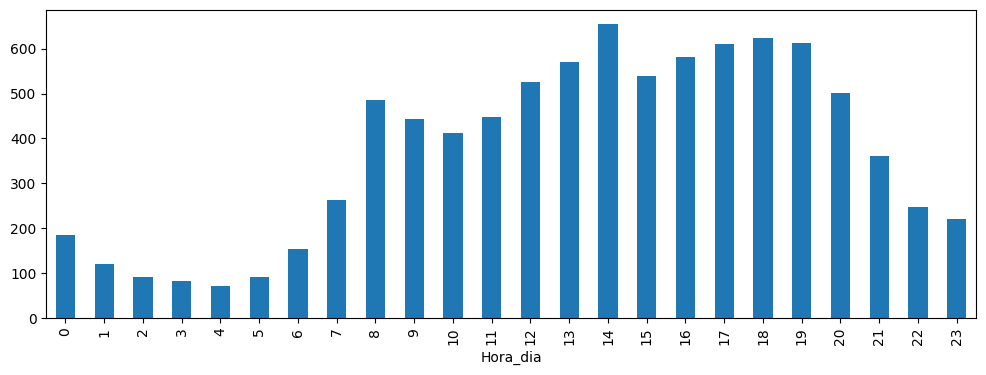

In [11]:
(
    df.
    groupby(["Hora_dia"])
    ['Numero_expedient'].count()
    .plot(kind = "bar", figsize = (12, 4))
)

### Accidentes por dia de semana

<Axes: xlabel='Descripcio_dia_setmana'>

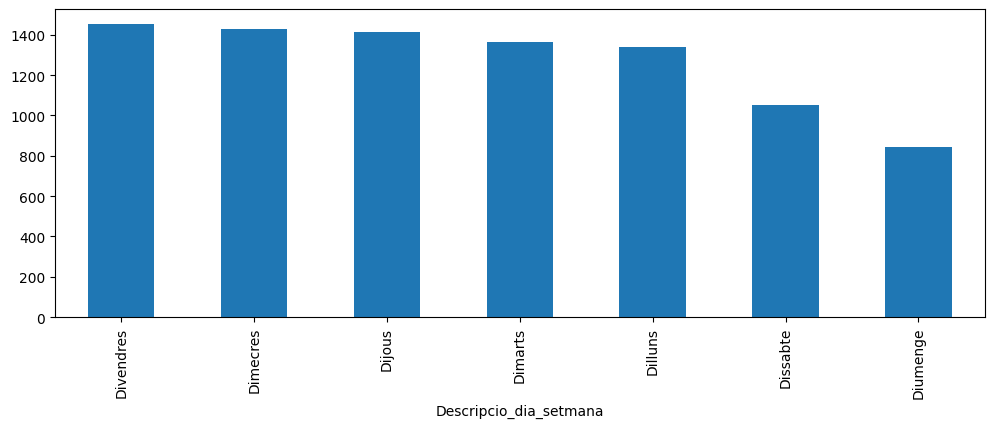

In [12]:
(
    df.
    groupby(["Descripcio_dia_setmana"])
    ['Numero_expedient'].count()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
)

### Accidentes por Distrito

<Axes: xlabel='Nom_districte'>

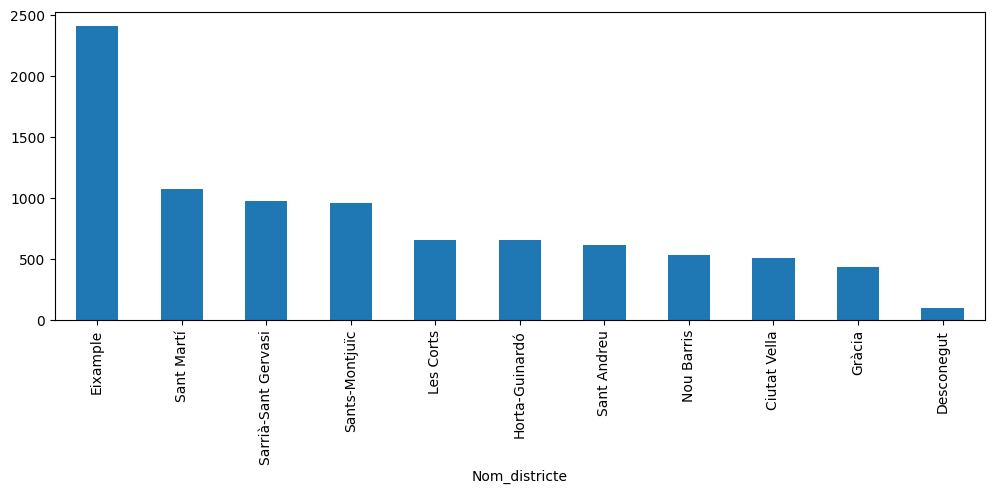

In [13]:
(
    df.
    groupby(["Nom_districte"])
    ['Numero_expedient'].count()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
)

### Accidentes por barrio

<Axes: xlabel='Nom_barri'>

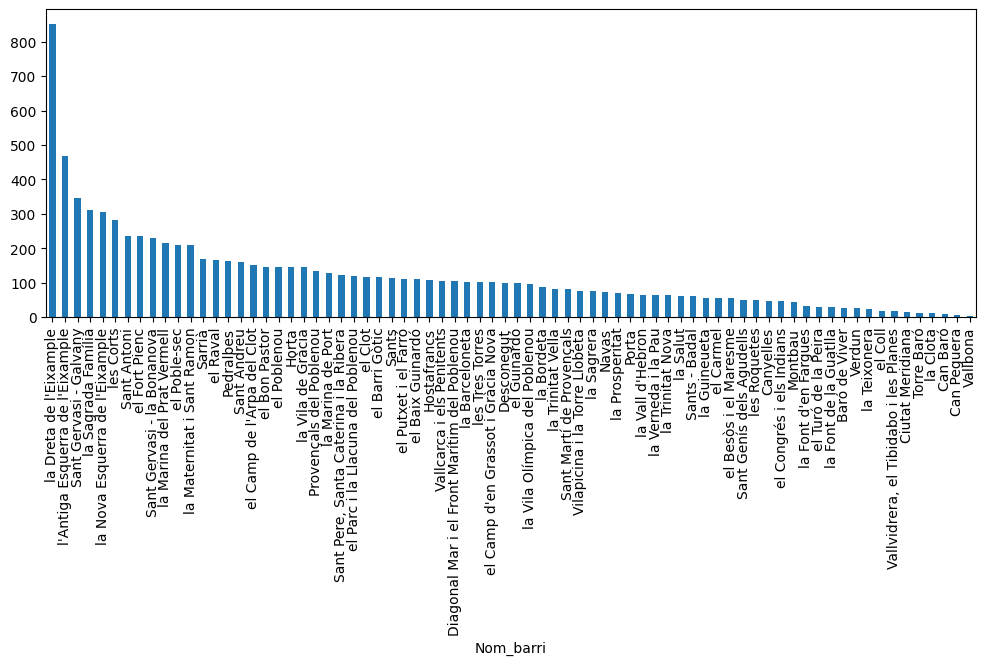

In [14]:
(
    df.
    groupby(["Nom_barri"])
    ['Numero_expedient'].count()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
)

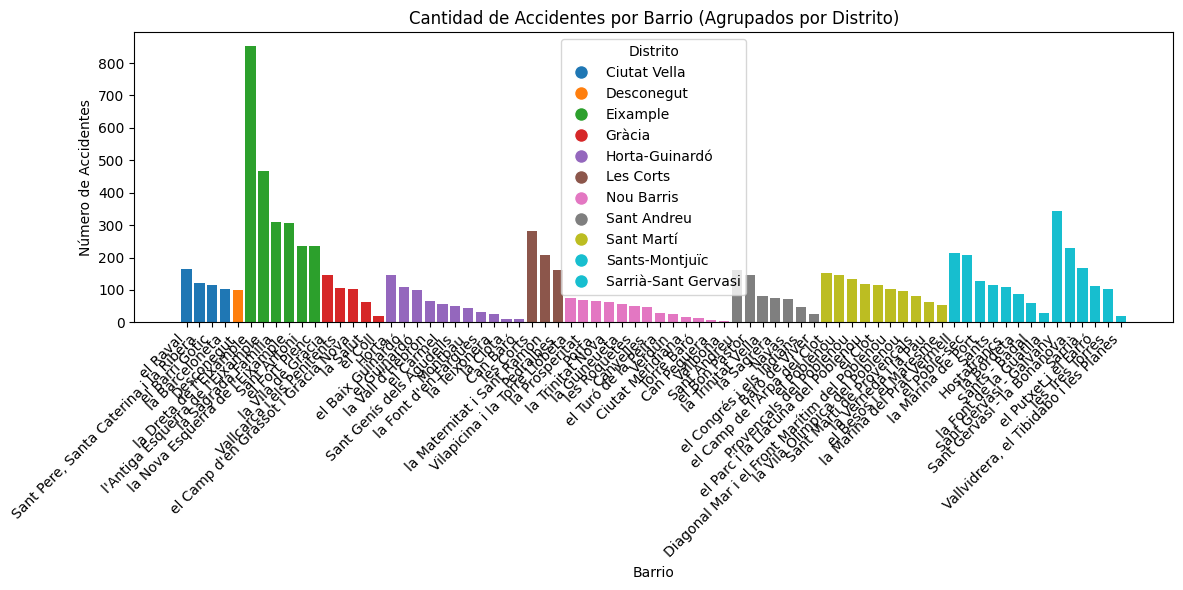

In [15]:
# Agrupar y contar accidentes por barrio y distrito
counts = df.groupby(['Nom_districte', 'Nom_barri'])['Numero_expedient'].count().reset_index()

# Ordenar primero por distrito y luego por número de accidentes
counts = counts.sort_values(by=['Nom_districte', 'Numero_expedient'], ascending=[True, False])

# Crear una lista de colores para cada distrito
unique_districts = counts['Nom_districte'].unique()
color_map = plt.get_cmap('tab10')
district_colors = {district: color_map(i) for i, district in enumerate(unique_districts)}

# Crear una nueva columna para los colores
counts['Color'] = counts['Nom_districte'].map(district_colors)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(counts['Nom_barri'], counts['Numero_expedient'], color=counts['Color'])

# Añadir título y etiquetas
plt.title('Cantidad de Accidentes por Barrio (Agrupados por Distrito)')
plt.ylabel('Número de Accidentes')
plt.xlabel('Barrio')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Añadir leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=district,
                       markersize=10, markerfacecolor=district_colors[district]) for district in unique_districts]
plt.legend(handles=handles, title='Distrito')

plt.tight_layout()
plt.show()


### Según tipos de accidente

<Axes: xlabel='Descripcio_causa_mediata'>

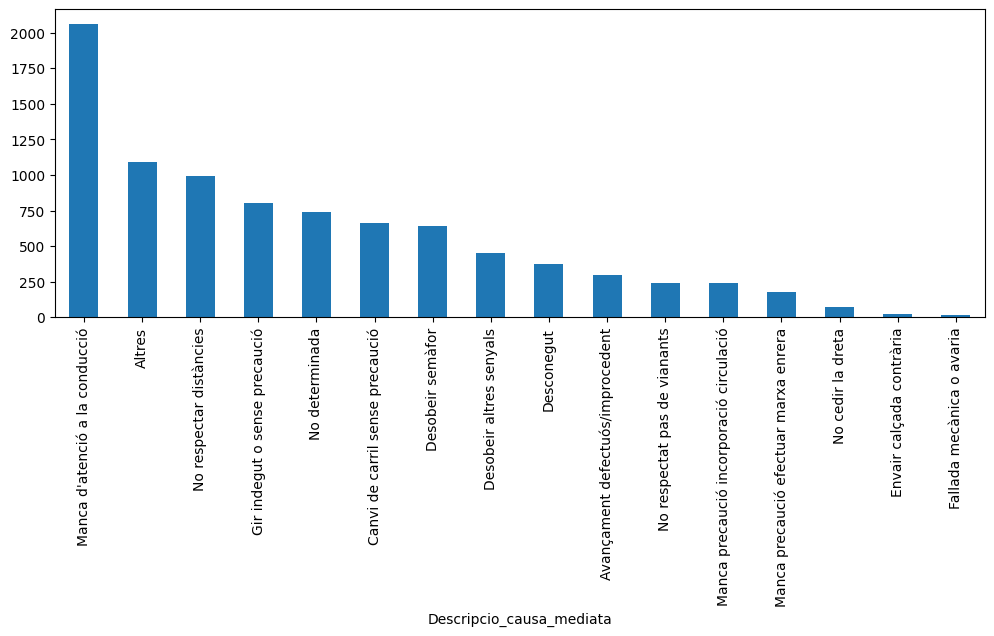

In [16]:
(
    df.
    groupby(["Descripcio_causa_mediata"])
    ['Numero_expedient'].count()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
)

In [1]:
(
    df.
    groupby(["Descripcio_torn"])
    ['Numero_expedient'].count()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
)

NameError: name 'df' is not defined

In [ ]:
Descripcio_torn

### Top 3 barrios y sus tipos de accidentes

#### Eixample

<Axes: xlabel='Descripcio_causa_mediata'>

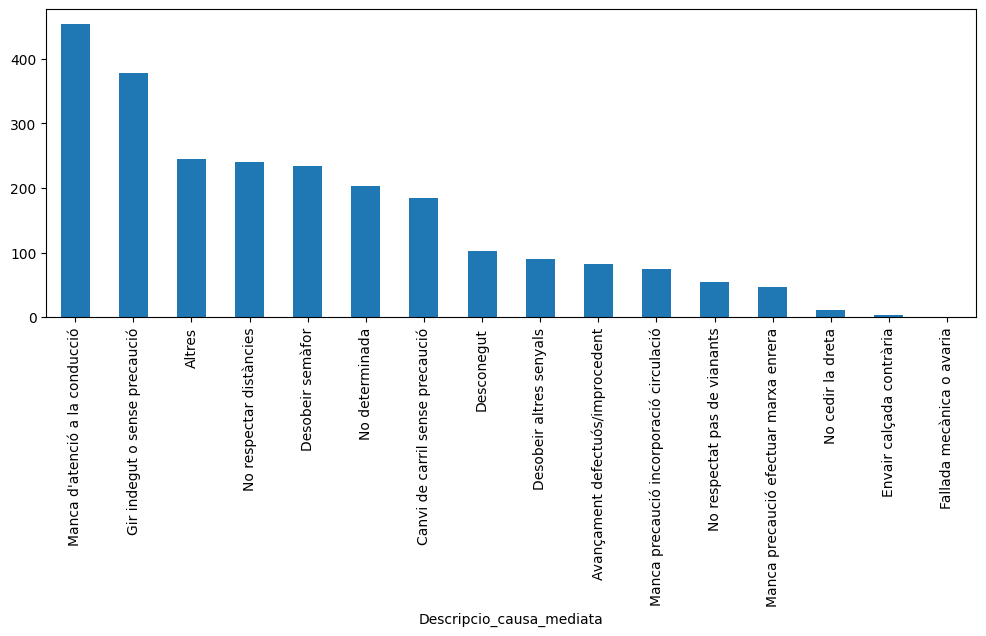

In [168]:
df_top1=df[df['Nom_districte']=='Eixample']
(
    df_top1.
    groupby(['Descripcio_causa_mediata'])
    ['Numero_expedient'].count()
    .sort_values(ascending =False)
    .plot(kind = "bar", figsize = (12, 4))
)


#### Sant Martí

<Axes: xlabel='Descripcio_causa_mediata'>

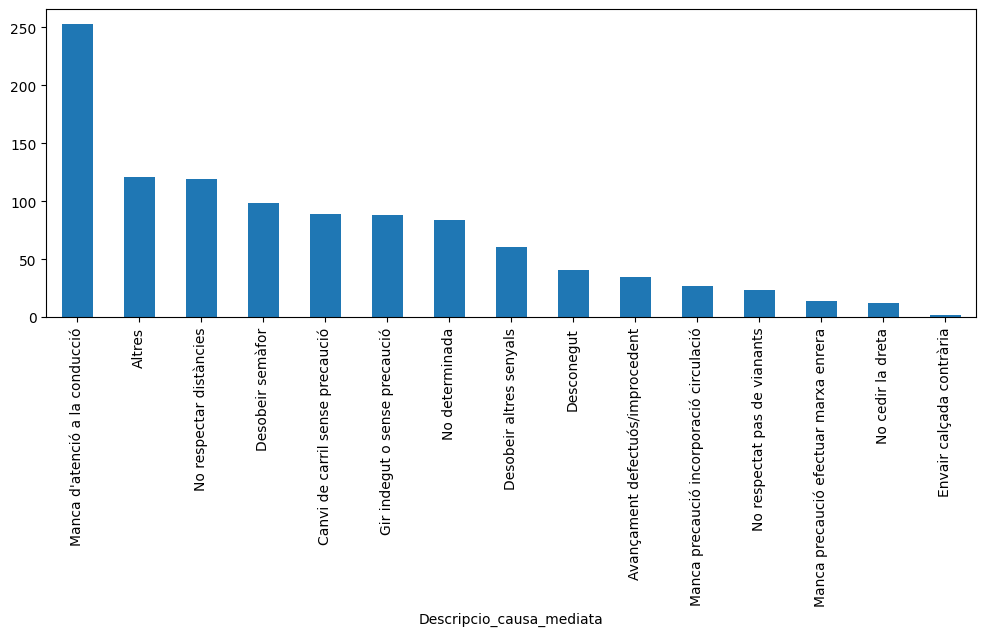

In [169]:
df_top2=df[df['Nom_districte']=='Sant Martí']
(
    df_top2.
    groupby(['Descripcio_causa_mediata'])
    ['Numero_expedient'].count()
    .sort_values(ascending =False)
    .plot(kind = "bar", figsize = (12, 4))
)



#### Sarrià-Sant Gervasi

<Axes: xlabel='Descripcio_causa_mediata'>

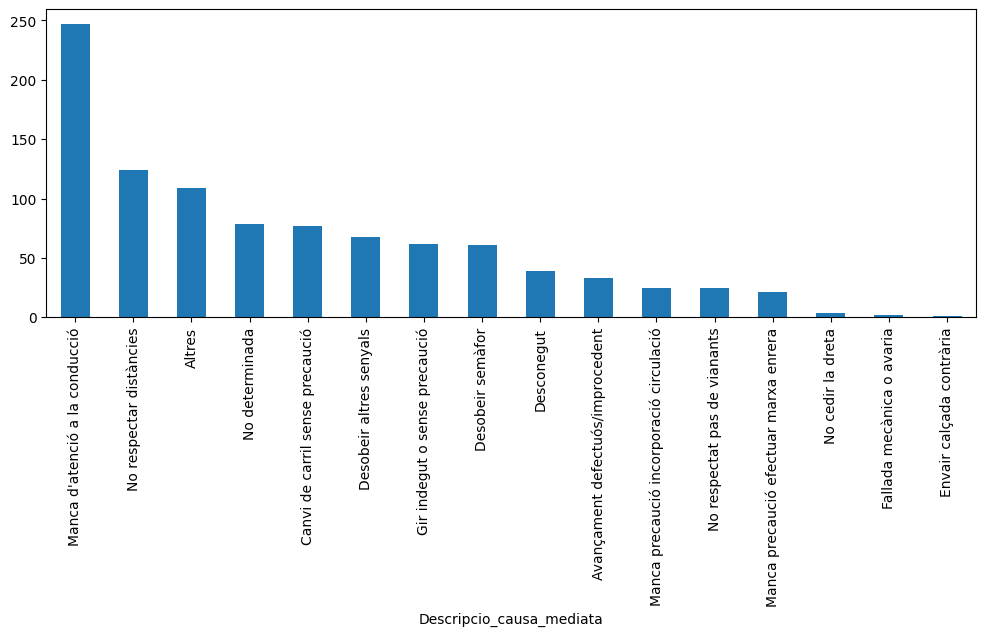

In [170]:
df_top3=df[df['Nom_districte']=='Sarrià-Sant Gervasi']
(
    df_top3.
    groupby(['Descripcio_causa_mediata'])
    ['Numero_expedient'].count()
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(12,4))
)

<Axes: xlabel='Descripcio_causa_mediata'>

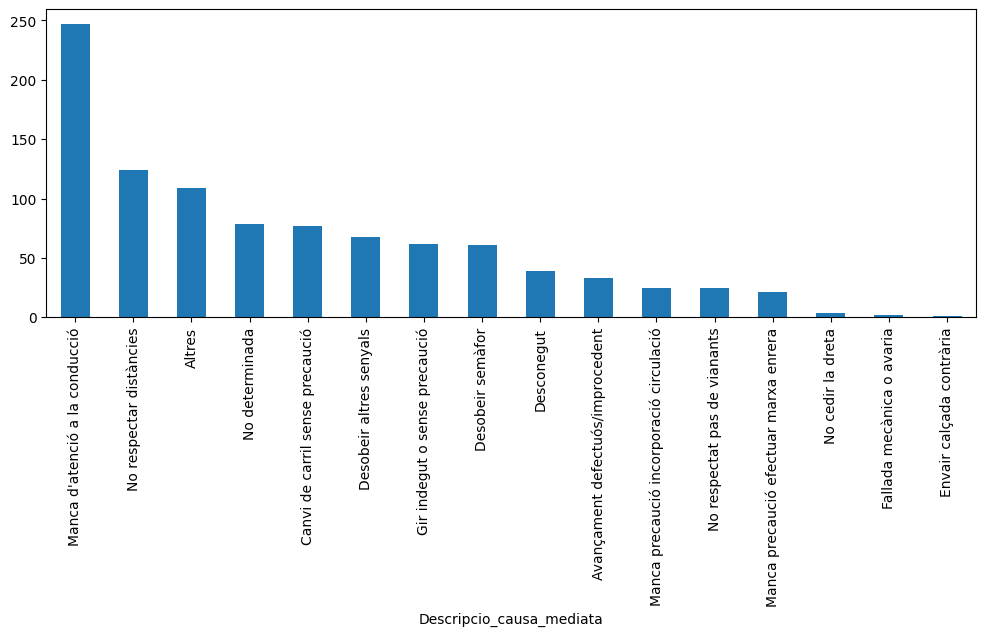

In [171]:
df_top3=df[df['Nom_districte']=='Sarrià-Sant Gervasi']
(
    df_top3.
    groupby(['Descripcio_causa_mediata'])
    ['Numero_expedient'].count()
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(12,4))
)

*Parece ser que la falta de atención a la conducción es la causa principal de accidentes en los distritos con más accidentes

## Modelado

Voy a intentar predecir la frecuencia de accidentes en los distritos, según la hora y el dia de la semana.
Selecciono primero las features más relevantes.

In [9]:
df_grouped = df.groupby(['Codi_districte', 'Descripcio_dia_setmana', 'Hora_dia', 'Descripcio_causa_mediata']).size().reset_index(name='num_accidents')

# convierto los datos categoricos a dummies
df_grouped = pd.get_dummies(df_grouped, columns=['Descripcio_dia_setmana', 'Descripcio_causa_mediata'])

#divido los datos en train y test
X=df_grouped.drop('num_accidents', axis=1)
y=df_grouped['num_accidents']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Primer modelo: RandomForestRegressor

In [173]:
# Definir el primermodelo base
rf = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda para hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Implementar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar el modelo de Random Forest
grid_search_rf.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_rf = grid_search_rf.best_params_
print(f"Mejores parámetros para Random Forest: {best_params_rf}")

# Evaluar el modelo de Random Forest en el conjunto de prueba
y_pred_rf = grid_search_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest - R²: {r2_rf}, MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}")



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores parámetros para Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Random Forest - R²: 0.2935632056531621, MAE: 0.5414959254216163, MSE: 0.6225671035326444, RMSE: 0.7890292158929506


Segundo modelo: XGBoost

In [174]:
# Define the parameter grid
param_dist = {
    'max_depth': randint(3, 12),
    'learning_rate': uniform(0.001, 0.299),  
    'n_estimators': randint(100, 1001),
    'subsample': uniform(0.6, 0.4),  
    'colsample_bytree': uniform(0.6, 0.4), 
    'min_child_weight': randint(1, 6),
    'gamma': uniform(0, 0.3),
    'alpha': uniform(0, 1),
    'lambda': uniform(0, 1)
}

# Uso GridSearchCV para encontrar los mejores parámetros
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1,  
    scoring='neg_mean_squared_error'  
)
random_search.fit(X_train, y_train)

# MEjores parámetros
best_params = random_search.best_params_
print("Mejores parámetros:", best_params)




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros: {'alpha': 0.658693631618945, 'colsample_bytree': 0.6651737708325719, 'gamma': 0.021170624220128952, 'lambda': 0.6424192782063156, 'learning_rate': 0.008926881851944922, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 789, 'subsample': 0.8293468166687733}


In [175]:
# Crear un nuevo modelo con los mejores parámetros
best_model = XGBRegressor(**best_params)
#Entrenar modelo
best_model.fit(X_train, y_train)

#Predicciones
y_pred_best = best_model.predict(X_test)

#Evaluacion
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
print(f"XGBoost tuned - R²: {r2_best}, MAE: {mae_best}, MSE: {mse_best}, RMSE: {rmse_best}")


# Imprimir los resultados de todas las iteraciones
#results = random_search.cv_results_
#for i in range(len(results['params'])):
 #   print(f"Iteración {i+1}:")
 #   print(f"  Parámetros: {results['params'][i]}")
 #   print(f"  Mean test score: {results['mean_test_score'][i]}")
 #   print(f"  Std test score: {results['std_test_score'][i]}")
 #   print()

XGBoost tuned - R²: 0.32129154842022767, MAE: 0.5349245448694062, MSE: 0.5981307290680141, RMSE: 0.7733891187933886


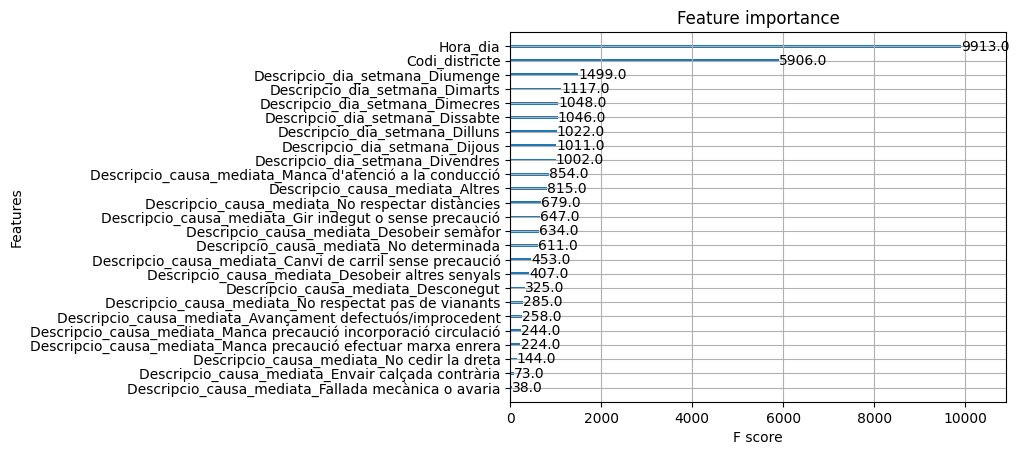

In [176]:
from xgboost import plot_importance

plot_importance(best_model)
plt.show()

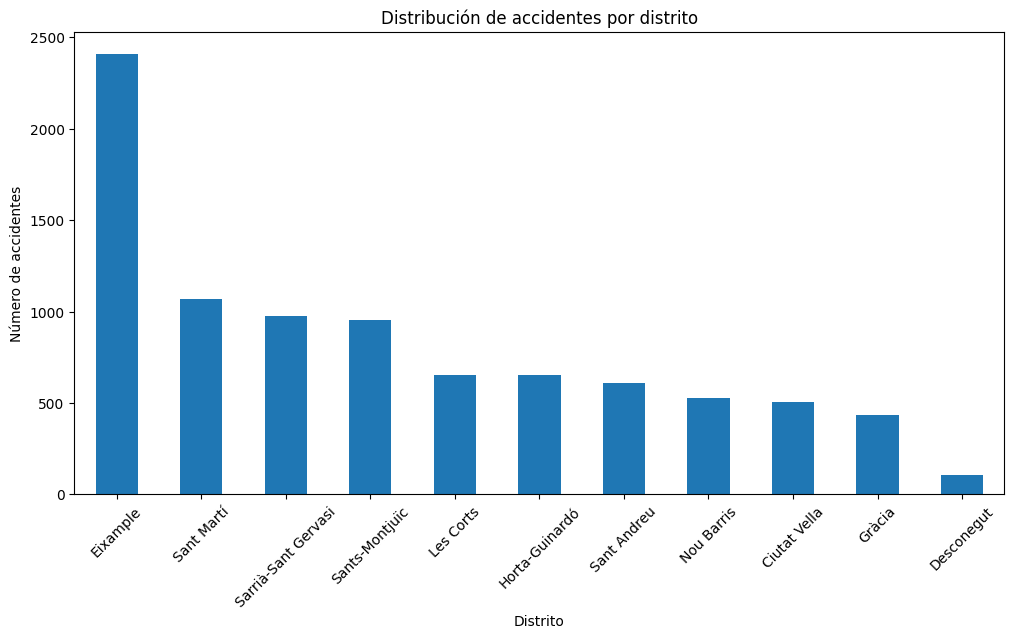

In [4]:
plt.figure(figsize=(12, 6))
df['Nom_districte'].value_counts().plot(kind='bar')
plt.title('Distribución de accidentes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

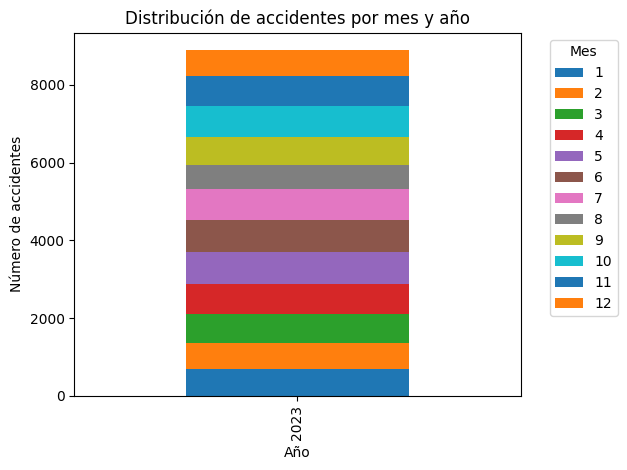

In [6]:
plt.figure(figsize=(12, 6))
df.groupby(['NK_Any', 'Mes_any'])['Numero_expedient'].count().unstack().plot(kind='bar', stacked=True)
plt.title('Distribución de accidentes por mes y año')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

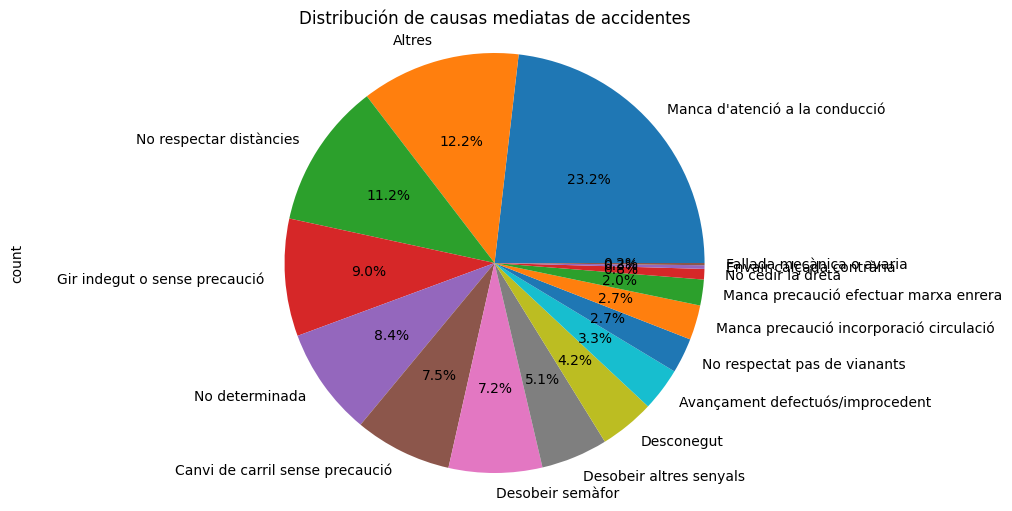

In [7]:
plt.figure(figsize=(12, 6))
df['Descripcio_causa_mediata'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de causas mediatas de accidentes')
plt.axis('equal')
plt.show()


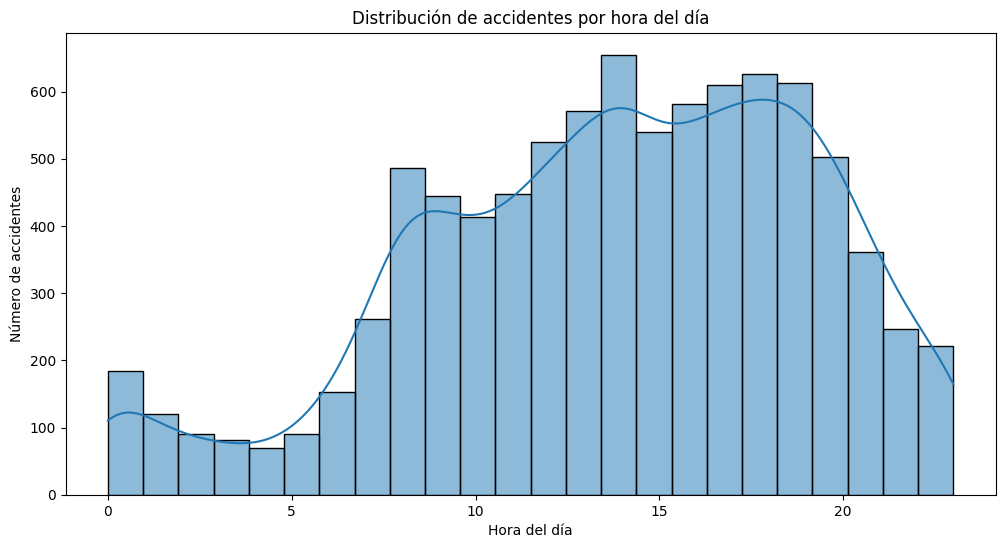

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Hora_dia'], bins=24, kde=True)
plt.title('Distribución de accidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.show()